In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
x = np.array([1, 2, 3, 6, 4, 5])
y = np.array([1, 3, 4, 7, 6, 6])

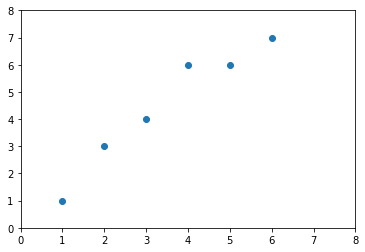

In [21]:
plt.scatter(x, y)
plt.axis((0, 8, 0, 8))
plt.show()

In [22]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [23]:
numerator = 0.0
denominator = 0.0
for xi, yi in zip(x, y):
    numerator += (xi - x_mean) * (yi - y_mean)
    denominator += (xi - x_mean) ** 2
a = numerator / denominator
b = y_mean - a * x_mean

In [24]:
a

1.1714285714285715

In [25]:
b

0.39999999999999947

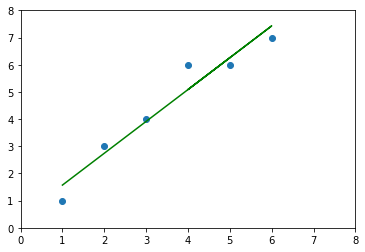

In [26]:
y_linear = [a * xi + b for xi in x]
plt.plot(x, y_linear, color='green')
plt.scatter(x, y)
plt.axis((0, 8, 0, 8))
plt.show()

# 使用手写的singlelinearegression

In [27]:
%%time
from my_ml.SimpleLinearRegression import SimpleLinearRegression1
reg1 = SimpleLinearRegression1()
reg1.fit(x, y)

CPU times: user 291 µs, sys: 141 µs, total: 432 µs
Wall time: 452 µs


SingleLinearRegression1()

In [28]:
x_predict = [1.3, 4.5]

In [29]:
reg1.predict(np.array(x_predict))

array([1.92285714, 5.67142857])

In [30]:
reg1.a_

1.1714285714285715

In [31]:
reg1.b_

0.39999999999999947

In [32]:
y_hat1 = reg1.predict(x)

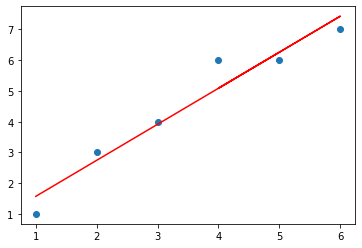

In [33]:
plt.scatter(x, y)
plt.plot(x, y_hat1, color='red')
plt.show()

# 向量化运算 取代for循环

In [34]:
%%time
from my_ml.SimpleLinearRegression import SimpleLinearRegression2
reg2 = SimpleLinearRegression2()
reg2.fit(x, y)

CPU times: user 197 µs, sys: 93 µs, total: 290 µs
Wall time: 315 µs


SingleLinearRegression2()

# 向量化的性能测试

In [37]:
m = 100000
big_x = np.random.random(size=m)
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m)

In [38]:
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

152 ms ± 3.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.46 ms ± 293 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
